**Cancer set Classification with Tensorflow** as an excuse to use Tensorboard callbacks

In [2]:
# Must run another "shift enter" run to complete the imports
# Science imports
import pandas as pd
import numpy as np

# Viz imports
import matplotlib.pyplot as plt
import seaborn as sns

# Config matplotlib
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True # in matplotlib, edge borders are turned off by default.
sns.set_style("darkgrid") # set a grey grid as a background

# turn off warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('TensorFlow_FILES/DATA/cancer_classification.csv')

In [14]:
df.head(3)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  ...  worst concavity  worst concave points  worst symmetry  worst fractal dimension  benign_0__mal_1
0        17.99         10.38           122.8     1001.0          0.11840  ...           0.7119                0.2654          0.4601                  0.11890                0
1        20.57         17.77           132.9     1326.0          0.08474  ...           0.2416                0.1860          0.2750                  0.08902                0
2        19.69         21.25           130.0     1203.0          0.10960  ...           0.4504                0.2430          0.3613                  0.08758                0

[3 rows x 31 columns]

In [4]:
df.benign_0__mal_1.value_counts()

1    357
0    212
Name: benign_0__mal_1, dtype: int64

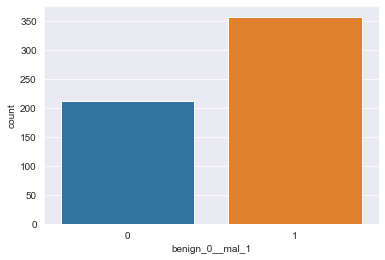

In [5]:
# Since this is classification, do a countplot of the actual label to get the number of instances per label
# "is this a well balanced problem or not?"
# more cases of malignant than benign, but relatively well balanced (212, 357)
sns.countplot(x='benign_0__mal_1',data=df)

#### calling a histogram for all the columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12609d6d0>,
      dtype=object)

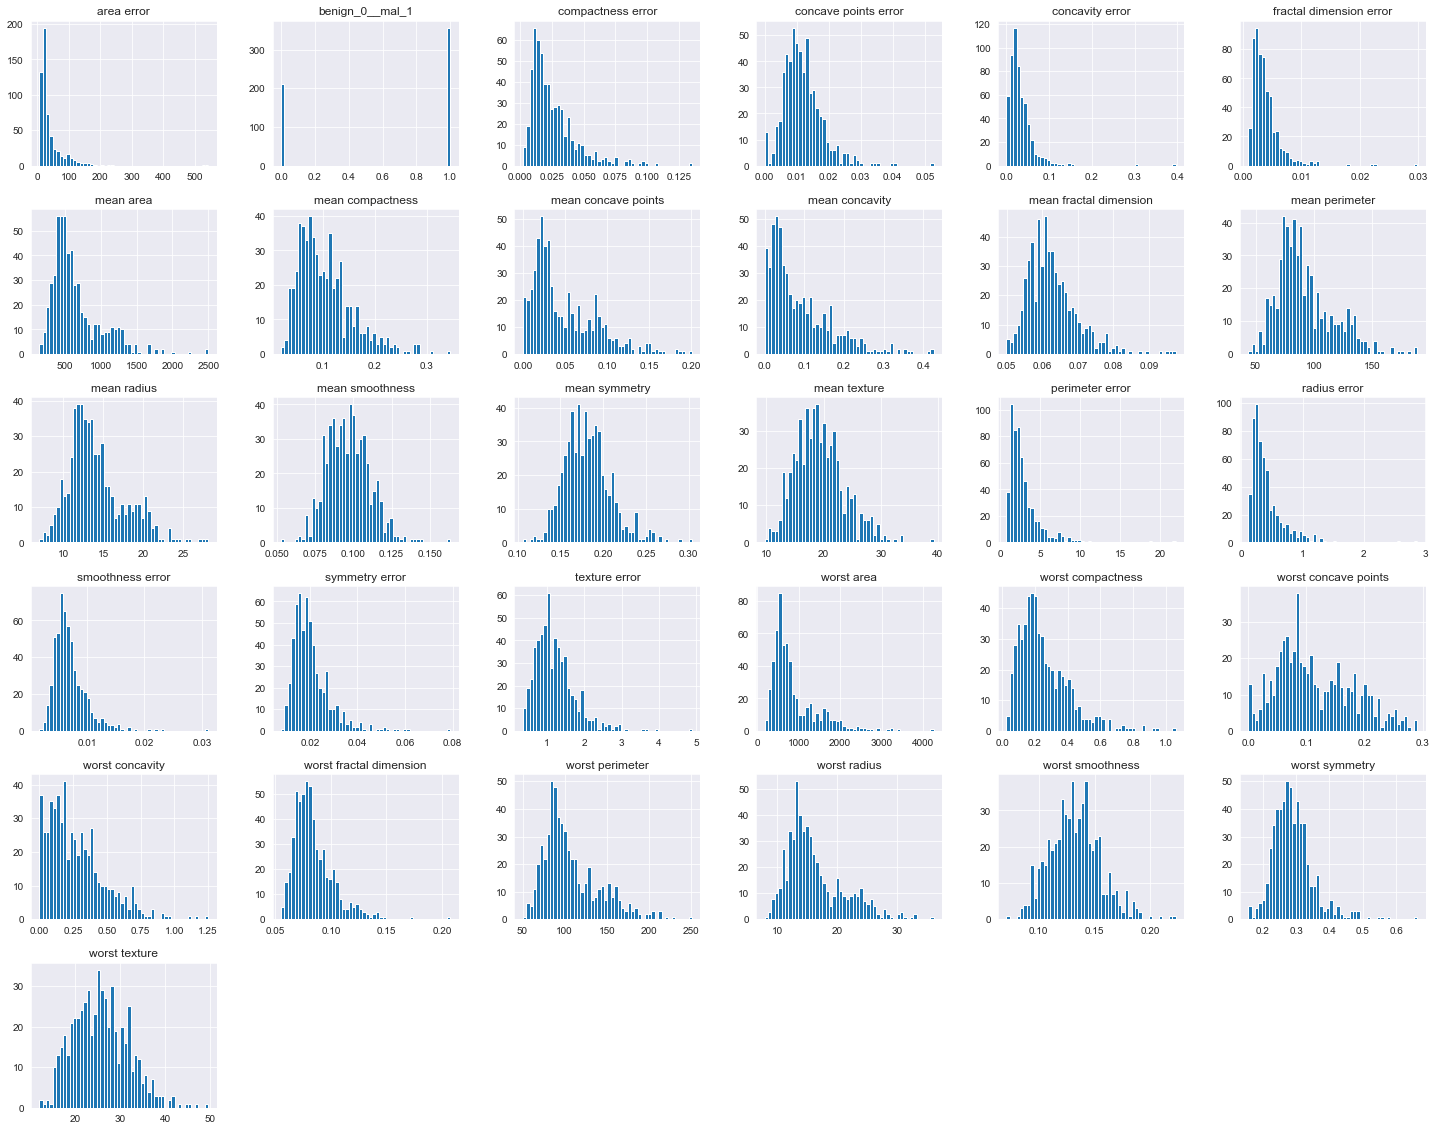

In [6]:
df.hist(bins=50,figsize=(25,20))

Using .loc[:] slicing

In [7]:
df.loc[:,df.columns != 'benign_0__mal_1'][:10]

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   
5        12.45         15.70           82.57      477.1          0.12780   
6        18.25         19.98          119.60     1040.0          0.09463   
7        13.71         20.83           90.20      577.9          0.11890   
8        13.00         21.82           87.50      519.8          0.12730   
9        12.46         24.04           83.97      475.9          0.11860   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760         0.30010              0.14710         0.2419   
1           0.07864         0.08690              0.07017         0.1812   
2           0.15990         0.19740              0.12790         0.2069   
3           0.28390         0.24140              0.10520         0.2597   
4           0.13280         0.19800              0.10430         0.1809   
5           0.17000         0.15780              0.08089         0.2087   
6           0.10900         0.11270              0.07400         0.1794   
7           0.16450         0.09366              0.05985         0.2196   
8           0.19320         0.18590              0.09353         0.2350   
9           0.23960         0.22730              0.08543         0.2030   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   
5                 0.07613  ...         15.47          23.75           103.40   
6                 0.05742  ...         22.88          27.66           153.20   
7                 0.07451  ...         17.06          28.14           110.60   
8                 0.07389  ...         15.49          30.73           106.20   
9                 0.08243  ...         15.09          40.68            97.65   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   
5       741.6            0.1791             0.5249           0.5355   
6      1606.0            0.1442             0.2576           0.3784   
7       897.0            0.1654             0.3682           0.2678   
8       739.3            0.1703             0.5401           0.5390   
9       711.4            0.1853             1.0580           1.1050   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  
5                0.1741          0.3985                  0.12440  
6                0.1932          0.3063                  0.08368  
7                0.1556          0.3196                  0.11510  
8                0.2060          0.4378                  0.10720  
9      

#### map chaining

In [58]:
df.benign_0__mal_1.map({1:'yes',0:'no'}).map('I am a {}'.format)

0       I am a no
1       I am a no
2       I am a no
3       I am a no
4       I am a no
5       I am a no
6       I am a no
7       I am a no
8       I am a no
9       I am a no
10      I am a no
11      I am a no
12      I am a no
13      I am a no
14      I am a no
15      I am a no
16      I am a no
17      I am a no
18      I am a no
19     I am a yes
20     I am a yes
21     I am a yes
22      I am a no
23      I am a no
24      I am a no
25      I am a no
26      I am a no
27      I am a no
28      I am a no
29      I am a no
          ...    
539    I am a yes
540    I am a yes
541    I am a yes
542    I am a yes
543    I am a yes
544    I am a yes
545    I am a yes
546    I am a yes
547    I am a yes
548    I am a yes
549    I am a yes
550    I am a yes
551    I am a yes
552    I am a yes
553    I am a yes
554    I am a yes
555    I am a yes
556    I am a yes
557    I am a yes
558    I am a yes
559    I am a yes
560    I am a yes
561    I am a yes
562     I am a no
563     I 

#### using style chaining

In [84]:
# .background_gradient() assignment overrides specific highlight colors, but preserves highlighting of max/min
df.style.hide_index().highlight_max(color='lightgreen').highlight_min(color='#cd4f39').background_gradient(cmap='plasma')

#### calling .style.set_properties inline

In [8]:
df.head(10).style.set_properties(**{'background-color': 'black',                                                   
                                    'color': 'lawngreen',                       
                                    'border-color': 'white'})

#### styles based on dtypes

In [13]:
df10 = df.copy()

In [14]:
# make a new df with strings
df10['yesno'] = df.benign_0__mal_1.map({1:'yes',0:'no'}).map('I am a {}'.format)

In [16]:
df10[:3]

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   

   mean fractal dimension  ...  worst perimeter  worst area  worst smoothness  \
0                 0.07871  ...            184.6      2019.0            0.1622   
1                 0.05667  ...            158.8      1956.0            0.1238   
2                 0.05999  ...            152.5      1709.0            0.1444   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   

   worst fractal dimension  benign_0__mal_1      yesno  
0                  0.11890                0  I am a no  
1                  0.08902                0  I am a no  
2                  0.08758                0  I am a no  

[3 rows x 32 columns]

In [28]:
df10.head(10).style.format({"yesno":lambda x: x.upper()}).applymap(lambda x: f”color: {'red' if isinstance(x,str) else 'black'}”)

SyntaxError: invalid character in identifier (<ipython-input-28-b8d7855de2aa>, line 1)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [31]:
df10.style.bar(subset=["worst_area",], color='lightgreen')\
                 .bar(subset=["worst_perimeter"], color='#ee1f5f')\
                 .bar(subset=["mean_area"], color='#FFA07A')

KeyError: "None of [Index(['worst_area'], dtype='object')] are in the [columns]"

#### Train/Test split the data

In [20]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
#train_test_split() - use shift tab to get the docstring
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [23]:
y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()

In [26]:
# scale the data
# training data needs fit/transform, test data just needs transform
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### create the model

In [27]:
# importing models and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [28]:
# what's the shape?
X_train.shape

(426, 30)

In [29]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

### Using Tensorboard

TensorBoard is a visualization tool provided with TensorFlow.

This callback logs events for TensorBoard, including:
* Metrics summary plots
* Training graph visualization
* Activation histograms
* Sampled profiling

If you have installed TensorFlow with pip, you should be able
to launch TensorBoard from the command line:

```sh
tensorboard --logdir=path_to_your_logs
```

In [30]:
from datetime import datetime

In [31]:
datetime.now().strftime("%Y-%m-%d--%H%M")

'2020-08-30--1952'

In [32]:
log_directory = 'logs\fit'

In [33]:
board = TensorBoard(log_dir=log_directory,histogram_freq=1,
    write_graph=True,
    write_images=True,
    update_freq='epoch',
    profile_batch=2,
    embeddings_freq=1)


In [34]:
# define the early stop callback
early_stop = EarlyStopping(monitor='val_loss',mode='min',patience=25,verbose=0)

#### define the model

In [35]:
model = Sequential()
# Output activation must be sigmoid since this is a binary classification problem
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid')) # output neuron
# since this is binary the loss function is binary_crossentropy
model.compile(loss='binary_crossentropy',optimizer='adam')



#### run the model

In [36]:
# fit the model
model.fit(x=X_train,y=y_train,epochs=20,validation_data=(X_test,y_test),verbose=0,
         callbacks=[early_stop])

#### Run tensorboard

```
i@here:~/$ tensorboard --logdir=logs/fit/
```

#### check out regular metrics

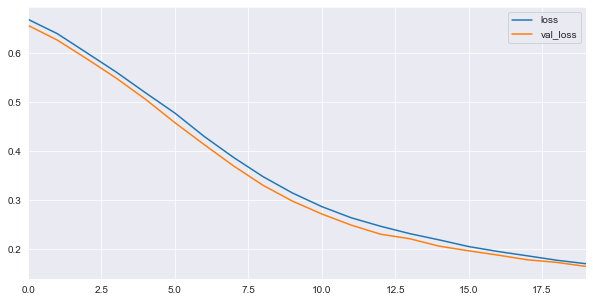

In [37]:
#
lossdf = pd.DataFrame(model.history.history)
#
lossdf.plot(figsize=(10,5))

#### display model hyperparameters

In [66]:
# dump the model hyperparameters
model.to_json()

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "units": 30, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 15, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_2", "trainable": true, "dtype"

In [69]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  930       
_________________________________________________________________
dense_1 (Dense)              multiple                  465       
_________________________________________________________________
dense_2 (Dense)              multiple                  16        
Total params: 1,411
Trainable params: 1,411
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.loss

'binary_crossentropy'

In [74]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 30,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 15,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'c

In [79]:
model.layers

### Prediction on Category Classification



In [60]:
# classification uses predict_classes
predictions = model.predict_classes(X_test)

W0831 11:10:06.772144 4680091072 deprecation.py:323] From <ipython-input-60-7164ee82932c>:2: Sequential.predict_classes (from tensorflow.python.keras.engine.sequential) is deprecated and will be removed after 2021-01-01.
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [61]:
predictions.to_json()

AttributeError: 'numpy.ndarray' object has no attribute 'to_json'

In [85]:
from sklearn.metrics import classification_report, confusion_matrix


In [86]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

   micro avg       0.97      0.97      0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [98]:
# shows that the network only misclassified one point in the test data
# True Negatives, False Positives
# False Negatives, True Positives
tn, fp, fn, tp = confusion_matrix(y_test,predictions).ravel()
print(confusion_matrix(y_test,predictions))
print('True Negatives',tn,'False Positives',fp,'False Negatives',fn,'True Positives',tp)

[[54  1]
 [ 3 85]]
True Negatives 54 False Positives 1 False Negatives 3 True Positives 85
